<a href="https://colab.research.google.com/github/vivekgautamgv/Python-For-Finance/blob/main/Long_Short_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Long-Short Equity Strategies
By Delaney Granizo-Mackenzie

Long-short equity refers to the fact that the strategy is both long and short in the equity market. This is a rather general statement, but has over time grown to mean a specific family of strategies. These strategies rank all stocks in the market using some model. The strategy then goes long (buys) the top
 equities of the ranking, and goes short on (sells) the bottom
 while maintaining equal dollar volume between the long and short positions. This has the advantage of being statistically robust, as by ranking stocks and entering hundreds or thousands of positions, you are making many bets on your ranking model rather than just a few risky bets. You are also betting purely on the quality of your ranking scheme, as the equal dollar volume long and short positions ensure that the strategy will remain market neutral (immune to market movements).



# Ranking Scheme
A ranking scheme is any model that can assign each stock a number, where higher is better or worse. Examples could be value factors, technical indicators, pricing models, or a combination of all of the above. Ranking schemes are the secret sauce of any long-short equity strategy, so developing them is nontrivial.

Making a Bet on the Ranking Scheme
Once we have determined a ranking scheme, we would like to be able to profit from it. We do this by investing an equal amount of money long into the top of the ranking, and short into the bottom. This ensures that the strategy will make money proportionally to the quality of the ranking only, and will be market neutral.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# We'll generate a random factor
current_factor_values = np.random.normal(0, 1, 10000)
equity_names = ['Equity ' + str(x) for x in range(10000)]
# Put it into a dataframe
factor_data = pd.Series(current_factor_values, index = equity_names)
factor_data = pd.DataFrame(factor_data, columns=['Factor Value'])
# Take a look at the dataframe
factor_data.head(10)

,Factor Value
Equity 0,0.191399
Equity 1,0.381404
Equity 2,0.365162
Equity 3,1.410521
Equity 4,0.531570
Equity 5,0.613627
Equity 6,1.380244
Equity 7,-0.614528
Equity 8,-1.404204
Equity 9,0.377567


In [3]:

# Now let's say our future returns are dependent on our factor values
future_returns = current_factor_values + np.random.normal(0, 1, 10000)

returns_data = pd.Series(future_returns, index=equity_names)
returns_data = pd.DataFrame(returns_data, columns=['Returns'])
# Put both the factor values and returns into one dataframe
data = returns_data.join(factor_data)
# Take a look
data.head(10)

,Returns,Factor Value
Equity 0,1.120194,0.191399
Equity 1,0.520971,0.381404
Equity 2,0.439112,0.365162
Equity 3,1.847982,1.410521
Equity 4,-0.565368,0.531570
Equity 5,1.367269,0.613627
Equity 6,0.209208,1.380244
Equity 7,-0.164066,-0.614528
Equity 8,-2.456994,-1.404204
Equity 9,-0.650149,0.377567


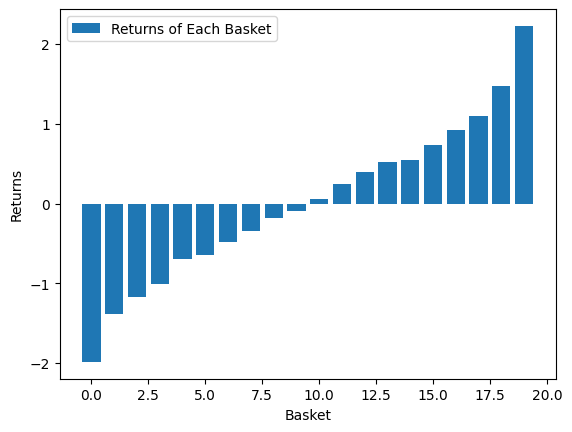

In [4]:

# Rank the equities
ranked_data = data.sort_values('Factor Value')

# Compute the returns of each basket
# Baskets of size 500, so we create an empty array of shape (10000/500)
number_of_baskets = 10000//500
basket_returns = np.zeros(number_of_baskets)

for i in range(number_of_baskets):
    start = i * 500
    end = i * 500 + 500
    basket_returns[i] = ranked_data[start:end]['Returns'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Returns')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);